<a href="https://colab.research.google.com/github/yunama47/CapstoneTeamC23-PC621/blob/main/Model/csv_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pydrive
# !pip install pandas
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import tensorflow as tf
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
import gdown
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
gauth = GoogleAuth()
drive = GoogleDrive(gauth)


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print(f'last accucary result : acc = {acc[-1]}, val_acc = {val_acc[-1]}')
  print(f'last loss result : loss = {loss[-1]}, val_loss = {val_loss[-1]}')

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
url_train = 'https://drive.google.com/file/d/1nqNCG_PdKeUO0nQUW3UnclJUMGgj4cmW/view?usp=sharing'
url_test = 'https://drive.google.com/file/d/1GnkbBu3W2ljCI6r0T9Vs9Hp9UDWJFLf3/view?usp=sharing'

path_file_train = "/content/train.csv"
path_file_test = "/content/test.csv"

In [ ]:
train_file_id = "1nqNCG_PdKeUO0nQUW3UnclJUMGgj4cmW"
test_file_id = "1GnkbBu3W2ljCI6r0T9Vs9Hp9UDWJFLf3"

In [ ]:
gdown.download(f"https://drive.google.com/uc?id={train_file_id}", path_file_train, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_file_id}", path_file_test, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nqNCG_PdKeUO0nQUW3UnclJUMGgj4cmW
To: /content/train.csv
100%|██████████| 22.1k/22.1k [00:00<00:00, 57.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GnkbBu3W2ljCI6r0T9Vs9Hp9UDWJFLf3
To: /content/test.csv
100%|██████████| 748/748 [00:00<00:00, 3.19MB/s]


'/content/test.csv'

In [ ]:
df_train = pd.read_csv(path_file_train)
df_test = pd.read_csv(path_file_test)

In [ ]:
df_train.head()

,Alias,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
0,_RARE_,0,65,2.1,0,2,0
1,_RARE_,0,70,2.7,1,2,0
2,_RARE_,1,59,2.6,1,2,0
3,_RARE_,1,80,2.7,0,2,1
4,_RARE_,0,60,2.5,1,2,0


In [ ]:
df_train = df_train.drop('Alias', axis=1)

In [ ]:
df_test = df_test.drop('Alias', axis=1)
print(df_train.columns)

Index(['Prestasi', 'NilaiUjian', 'PenghasilanOrtu', 'PunyaSejenisKIP',
       'KepemilikanRumah', 'Target'],
      dtype='object')


In [ ]:
df_test = df_test.drop(df_test.columns[[0]], axis=1)

In [ ]:
df_test.tail()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
17,0,92,1.8,1,2,1
18,0,47,1.7,1,2,0
19,0,59,2.9,0,2,0
20,0,88,3.8,0,2,0
21,0,87,3.9,0,2,0


In [ ]:
df_train.tail()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
995,0,58,2.2,1,2,1
996,0,78,2.9,0,2,0
997,0,58,2.6,0,2,0
998,0,79,2.5,0,2,0
999,1,78,2.2,1,2,1


In [ ]:
x_train = df_train.drop('Target', axis=1).values
y_train = df_train['Target'].values

x_test = df_test.drop('Target', axis=1).values
y_test = df_test['Target'].values



In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(features_test, target_test, test_size=0.5, random_state=42)

In [ ]:
# df_testing = df_test.values

In [ ]:
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

last accucary result : acc = 0.7609999775886536, val_acc = 1.0
last loss result : loss = 0.43757131695747375, val_loss = 0.14216311275959015


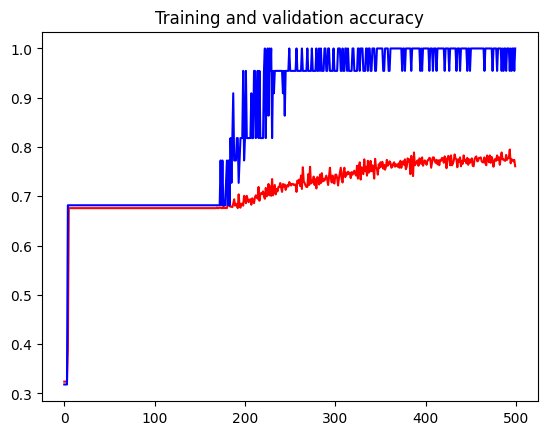

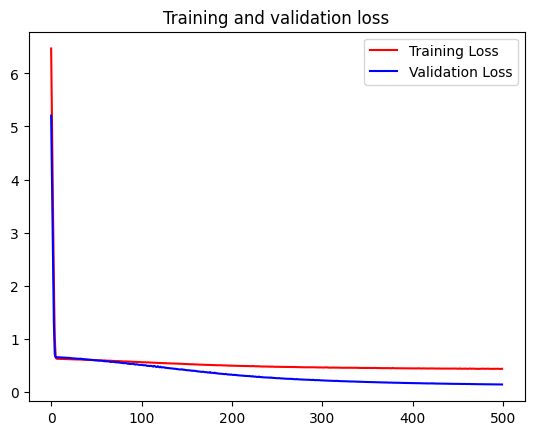

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Normalization(axis=-1))
model.add(Dense(64, activation='relu', input_dim=[6]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(9e-5), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs=500,
                    validation_data=(x_test, y_test), 
                    # callbacks=[lr_schedule],
                    verbose=0)
plot_loss_acc(history)

In [ ]:
model.save('csv_model.h5')

In [ ]:
import numpy as np

lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])
plt.semilogx(lrs, history.history["accuracy"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 5])